In [1]:
import numpy as np
import sklearn
import scipy
import pandas
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import itertools

In [2]:
np.random.seed(seed=1)
BASE_SAMPLES = 10000
SCALE = 100
ANOMALY_LOC = 700
ANOMALY_SCALE = 30

In [3]:
xys = []

In [4]:
# 平坦 0
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES)
xys.append([x, y])

In [5]:
# 全体的に傾向あり+方向 1
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES) + (y/(BASE_SAMPLES/20))
xys.append([x, y])

In [6]:
# 平坦 + 異常 2
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES)
x = np.append(x, np.random.normal(loc=2.0, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=100))
xys.append([x, y])

In [7]:
# 全体傾向あり + 異常 3
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES) + (y/(BASE_SAMPLES/20))
x = np.append(x, np.random.normal(loc=2.0, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=100))
xys.append([x, y])

In [8]:
# 平坦 + 平坦異常 相関低い 4
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES)
x = np.append(x, np.random.normal(loc=0, scale=1, size=100))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=100))
xys.append([x, y])

In [9]:
# 全体傾向あり + 逆異常 相関低い 5
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES) + (y/(BASE_SAMPLES/20))
x = np.append(x, np.random.normal(loc=-2.0, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=100))
xys.append([x, y])

In [30]:
def draw_graph(x, y):
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y)
    plt.scatter(x, y)
    plt.show()

    plt.scatter(x, y)
    a = lr.coef_
    print(f"決定係数: {lr.score(x.reshape(-1,1), y):.4f}")
    print(f"傾き: {a[0]}")
    b = lr.intercept_
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = x_min*a + b
    y_max = x_max*a + b
    plt.plot([x_min, x_max], [y_min, y_max], c='red')
    plt.show()

    plt.hist(y)
    plt.show()

0


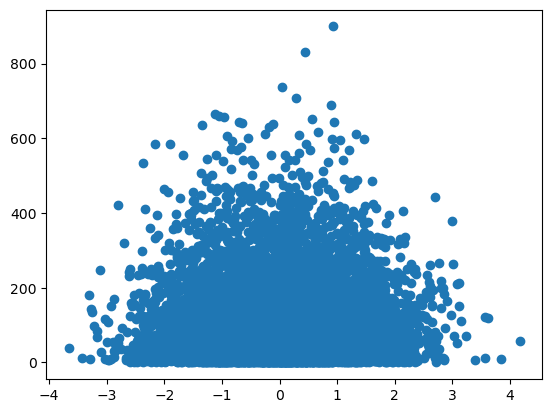

決定係数: 0.0000
傾き: -0.32245779988099527


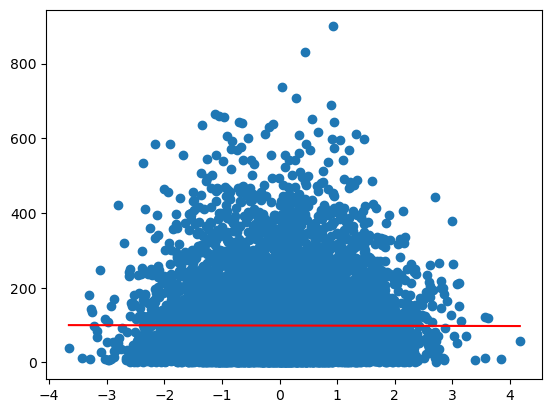

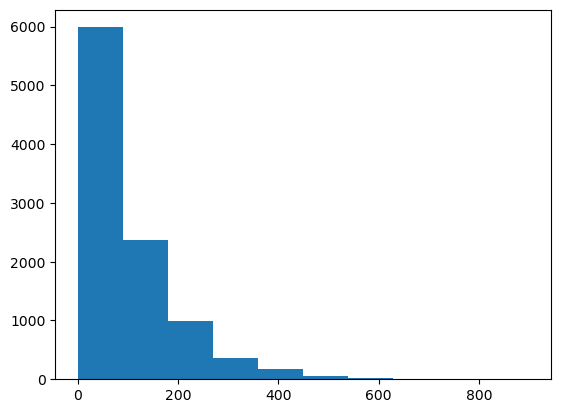

1


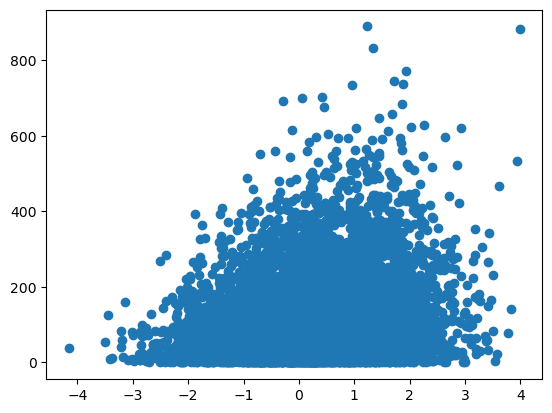

決定係数: 0.0408
傾き: 19.768226693336395


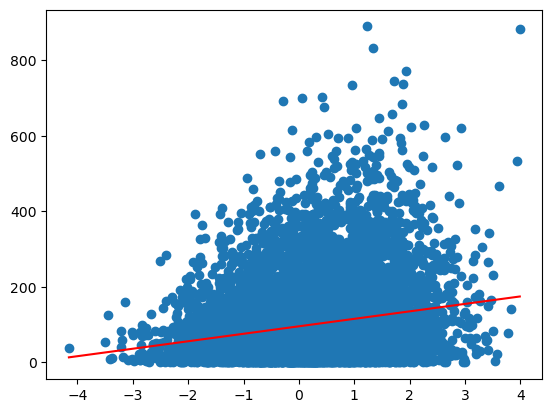

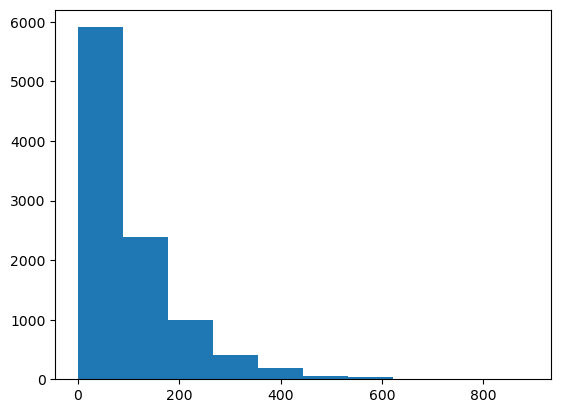

2


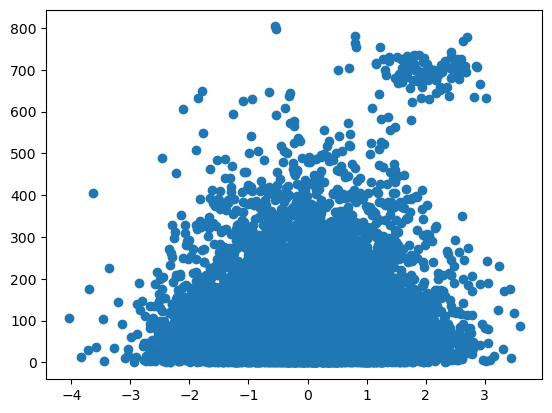

決定係数: 0.0118
傾き: 12.108026694388085


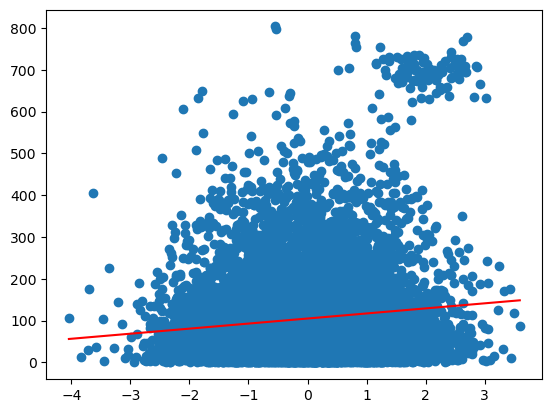

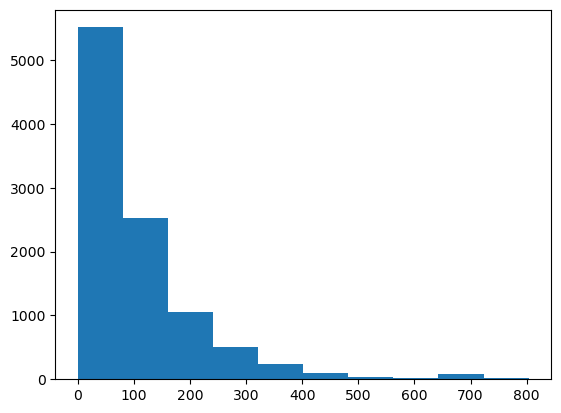

3


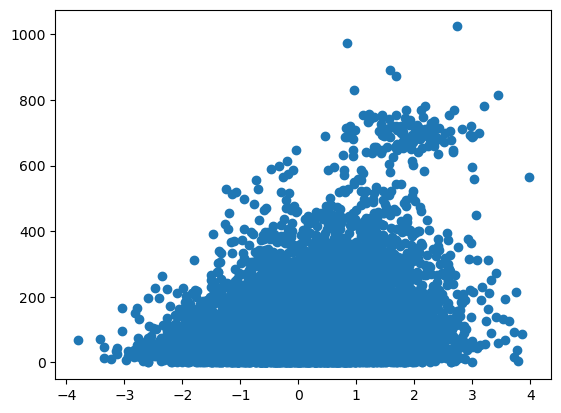

決定係数: 0.0602
傾き: 28.17240007000565


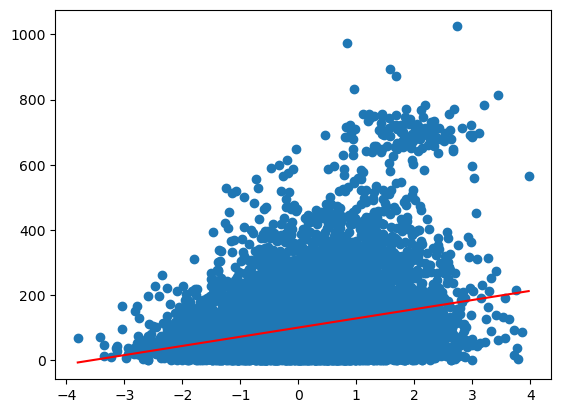

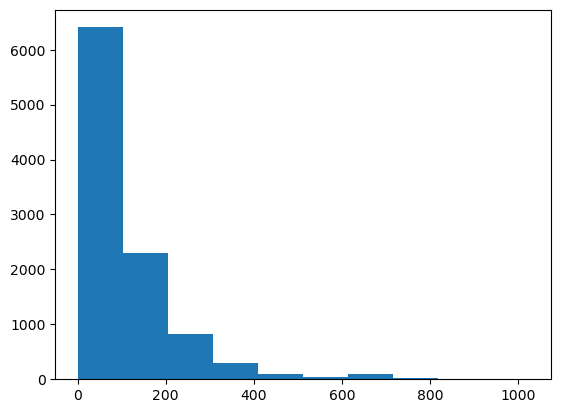

4


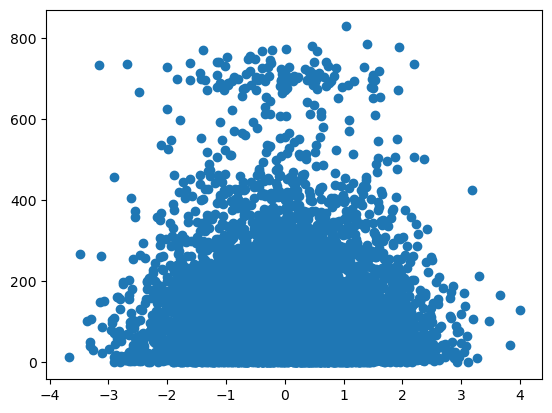

決定係数: 0.0001
傾き: -0.872306450466784


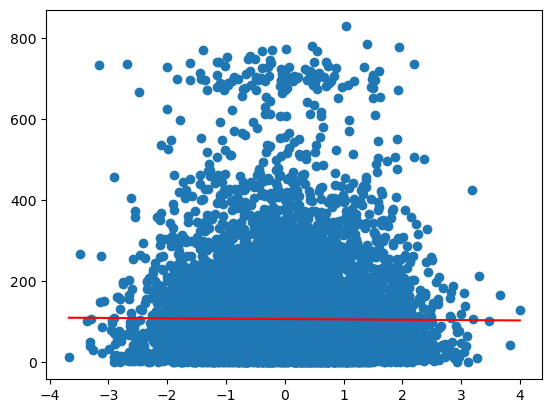

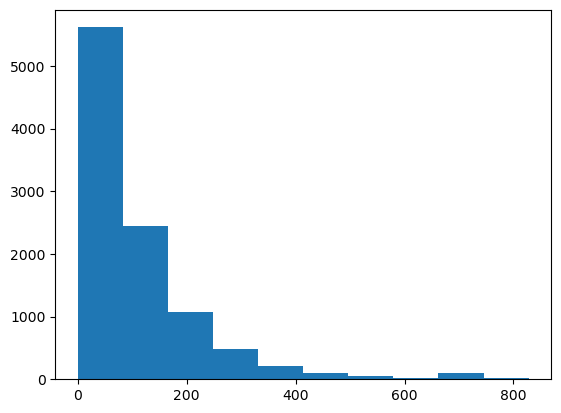

5


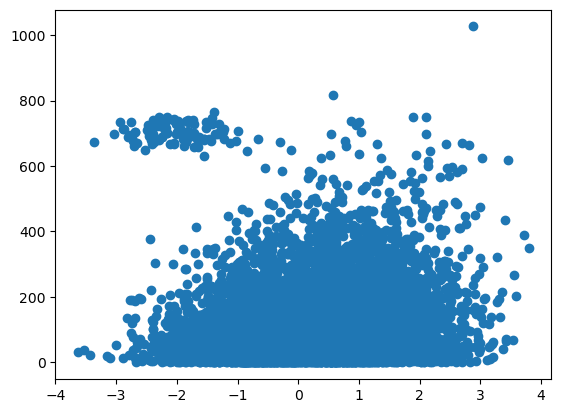

決定係数: 0.0044
傾き: 7.417880792018508


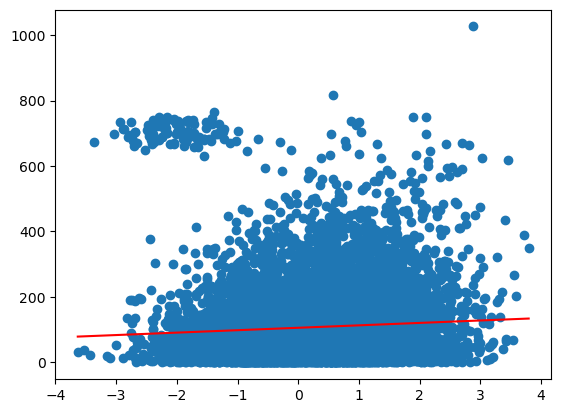

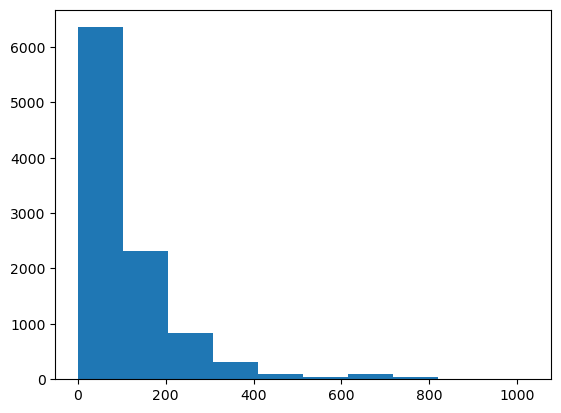

In [31]:
i = 0
for x, y in xys:
    print(i)
    draw_graph(x, y)
    i = i + 1

1.0


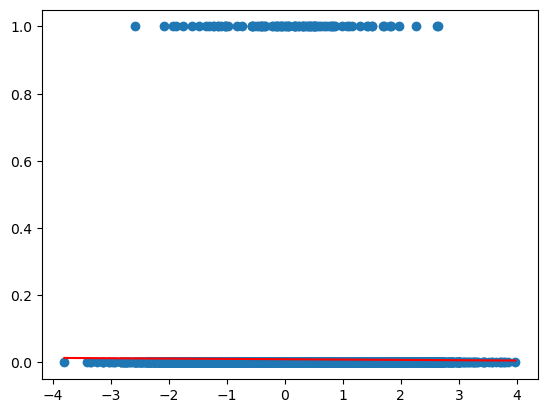

117.0


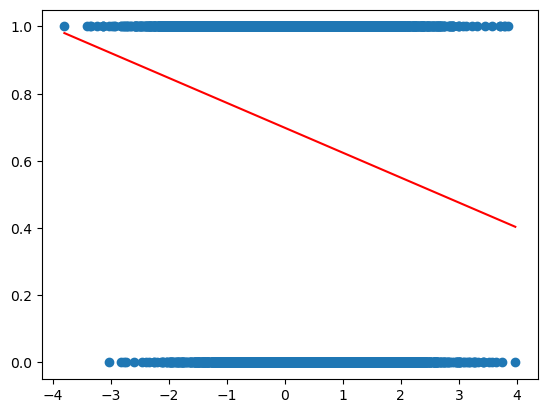

233.0


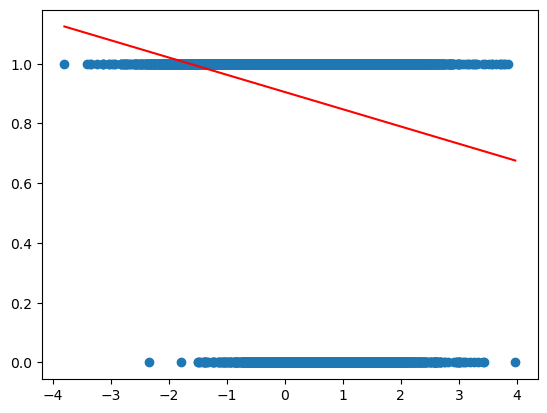

351.0


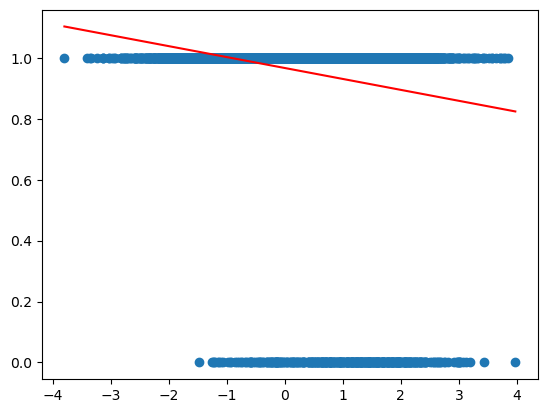

507.0


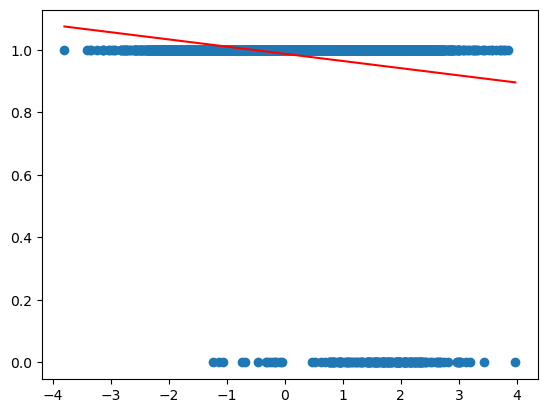

893.0


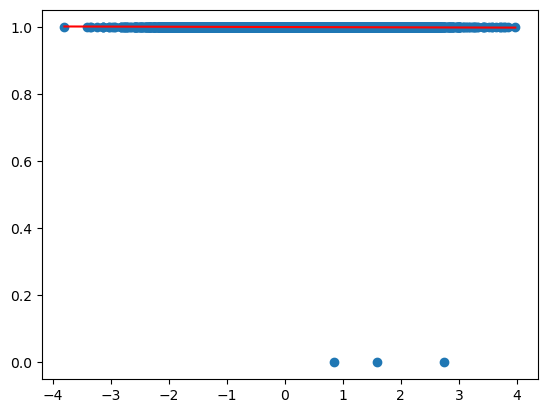

In [32]:
x, y = xys[3]
uniq = np.unique(np.floor(y))[1:]
#print(uniq)
for k in itertools.islice(uniq, 0, None, int(len(uniq)/5)):
    print(k)
    y_k = np.where(y < k, 1, 0)
    plt.scatter(x, y_k)

    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y_k)
    a = lr.coef_
    b = lr.intercept_
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = x_min*a + b
    y_max = x_max*a + b
    plt.plot([x_min, x_max], [y_min, y_max], c='red')

    plt.show()